In [4]:
import numpy as np
import astropy.io.fits as pf
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import Image
import scipy
from scipy import signal as sc
import os

In [5]:
%matplotlib inline

In [6]:
# 1 argument: fits file name (string)
# output: normalized, registered, and deblazed plot of Hydrogen-alpha absorption feature

# must have 'apf_wav copy.fits' in directory

def normalized_registered_and_deblazed_plot(file_name):
    file = pf.open('data/'+file_name)
    header = file[0].header
    target_object = header['TOBJECT']
    image = file[0].data
    
    wave = pf.open('apf_wav copy.fits')
    wave_values = wave[0].data
    
    x = wave_values[53,0:4600]
    y = image[53,0:4600]
    
    # normalize y values to 1
    y_norm = y/np.percentile(np.sort(y),99)
    
    # debalze
    y_medfit = sc.medfilt(y_norm, kernel_size = 151)
    maximum = np.max(np.percentile(y_medfit, 96))
    fix = np.where(y_medfit[1750:2350]>0.97, y_medfit[1750:2350], maximum)

    new_y_medfit = np.append(y_medfit[:1750],fix)
    blaze_function = np.append(new_y_medfit, y_medfit[2350:])
    
    # register
    dl_l = (wave_values[53,2844:2845]-wave_values[53,2843:2844])/wave_values[53,2843:2844]
    v = (dl_l*3*10**5)[0]
    lambda1 = wave_values[53,0]
    shifted = np.array([lambda1])
    for i in np.arange(0,4599):
        new_lambda = shifted[i] + (wave_values[53,i+1])*v/(3*10**5)
        shifted = np.append(shifted, new_lambda)
    
    #plot
    plt.title('Star: ' + target_object)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Normalized Intensity')
    plt.ylim(top = 1.5)
    plt.plot(shifted,y_norm/blaze_function)
    
    return y_norm/blaze_function


array([1.02665345, 1.        , 1.01170928, ..., 1.26169037, 1.28105633,
       1.2509422 ])

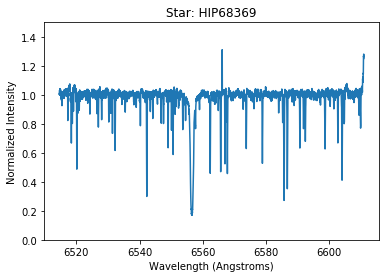

In [7]:
normalized_registered_and_deblazed_plot('rbni.983.fits')

array([1.03224056, 1.06622269, 1.06273187, ..., 1.0068946 , 1.        ,
       1.        ])

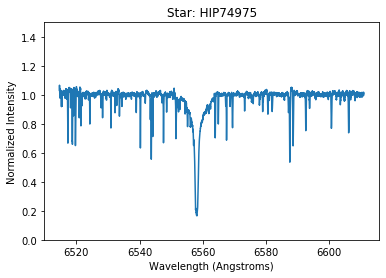

In [8]:
normalized_registered_and_deblazed_plot('rbni.993.fits')

array([1.10269822, 1.11057427, 1.09445377, ..., 1.44924076, 1.48327085,
       1.47774798])

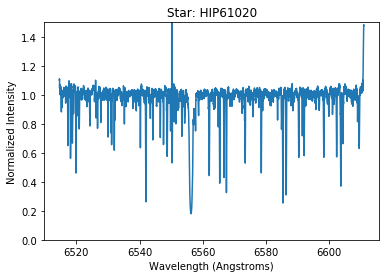

In [9]:
normalized_registered_and_deblazed_plot('rbnj.172.fits')

array([1.12752229, 1.10061617, 1.11855774, ..., 1.23723049, 1.24495153,
       1.2573124 ])

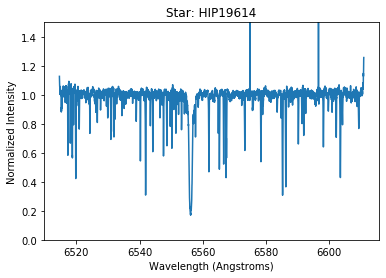

In [10]:
normalized_registered_and_deblazed_plot('rbnj.231.fits')

array([1.06661912, 1.04832401, 1.05747145, ..., 1.        , 0.99945559,
       1.00865097])

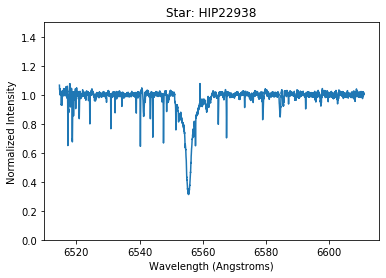

In [11]:
normalized_registered_and_deblazed_plot('rbnj.234.fits')

In [12]:
# returns chi squared value between two H-alpha spectra and graphs each spectra on same plot
# orange plot is the test spectra and blue plot is the known spectra (star name is known spectra)
# 1st argument: file name (string) of spectra you are testing
# 2nd argument: file name (string) of know spectra

def chi_squared_value(test, known):
    test_array = normalized_registered_and_deblazed_plot(test)
    known_array = normalized_registered_and_deblazed_plot(known)
    return np.sum(((test_array - known_array)**2)/test_array)

137.24551956898438

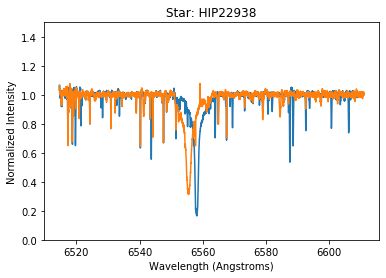

In [13]:
chi_squared_value('rbni.993.fits','rbnj.234.fits')

52.144742557146714

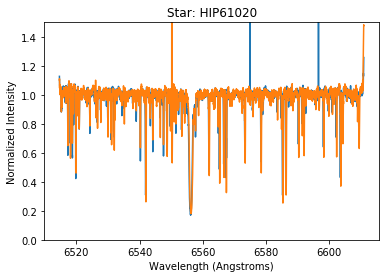

In [14]:
chi_squared_value('rbnj.231.fits','rbnj.172.fits')

41.57157283649072

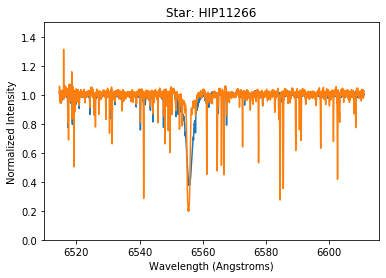

In [15]:
chi_squared_value('rbnj.206.fits', 'rbni.020.fits')